In [58]:
# Place here the same 6-digit number you selected for the first coursework. 
# Make sure that you keep a copy of this number and avoid trivial numbers, such as 000000 or 123456 -- thank you!
436517

436517

# Assignment 2 - Regression and Classification

Second assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This coursework aims to provide students with a comprehensive understanding of linear regression with polynomial basis functions and classification with K-nearest neighbours. Specifically, students will learn about key concepts related to the model's generalisation ability by changing the degree of the polynomial and the size of the dataset. In the second part of the coursework, students will delve into classification using the K-nearest neighbours algorithm. Finally, students will be introduced to the concept of using a validation set to select the optimal value of $K$ for their classification model. By the end of this coursework, students will have gained a solid understanding of these key concepts and be equipped with the skills to apply them in practical scenarios.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Polynomial Fitting Visualisation](#Polynomial-Fitting-Visualisation) (50%)
2. [Classification with KNN](#Classification-with-KNN) (50%)

In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle as pkl
from sklearn.datasets import load_digits

# Polynomial Fitting Visualisation
In this exercise you will explore the effect that the degree of the polynomial and the size of the training data has on the model's performance and generalisation ability.

1. Generate a 2D dataset of 15 points $(x_i,y_i)$ for $i=1..15$ using a sine wave perturbed by a small gaussian noise --- this is very similar to what you did in the lab.
    - The $x_i$ should be equally spaced in the $[0-10]$ interval 
    - Use: $y_i = 4*sin(x_i) + \epsilon$, where $\epsilon$ is gaussian noise (with $\mu=0$ and $\sigma=1$).
    - To ensure reproducibility of your results, use (provided below): 
    `rng = np.random.default_rng(13)` and
    `random_state = np.random.RandomState(13)`
    
2. Split the points randomly into a training and testing sets of size 10 and 5, respectively.
    
3. Learn the weights of the linear regression for  polynomial models of degree $M$ for $M = 0..9$ . For each value of $M$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $M$. Your figure should be similar to Figure 1 from the Coursework document.

4. In the last part of this exercise, you will have to create more points for training (using the same sine wave perturbed by a small gaussian noise as described in point 1). For testing, you will continue to use the same 5 points you used in points 1 to 3. Learn the weights of the linear regression for  polynomial models of degree $M=9$ for training sets of size $N$ with $N=10:500:10$ (that is, from $N=10$ to $N=500$ in steps of $10$). For each value of $N$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $N$. Your figure should be similar to Figure 2 from the Coursework document.

* Note that for parts 3 and 4 you are supposed to write your code from scratch and you cannot use existing functions such as `PolynomialFeatures`, `LinearRegression` or `mean_squared_error`.
* _Observation: in this exercise we are not using the validation set because our goal is not to choose a specific model but rather to analyse the behaviour of the family of models._

### Generate the data

In [60]:
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

In [61]:
# your code goes here:

#Definindo os parâmetros
mu = 0
theta = 1
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

#Gerando os valores de x igualmente espaçados
x = np.linspace(0, 10, 15)

#Gerando os valores de y perturbados pelo ruído gaussiano
y = 4 * np.sin(x) + rng.normal(mu, theta, 15)

print(x)
print(y)

[ 0.          0.71428571  1.42857143  2.14285714  2.85714286  3.57142857
  4.28571429  5.          5.71428571  6.42857143  7.14285714  7.85714286
  8.57142857  9.28571429 10.        ]
[ 1.82675656 -0.45802032  4.91767628  3.43278565  2.44076762 -1.28125736
 -1.81412915 -3.80395334 -2.6710506   1.15998287  3.46262052  3.64314066
  2.76664309  1.27390424 -1.47176845]


### Split the points into training and testing
Feel free to use `train_test_split(x, y, test_size = ?, random_state = random_state)`, remember to calculate the right proportion for the `test_size` so that you end up with 5 points in the testing set.

In [62]:
# your code goes here:
#Train test split com test size 1/3 garantindo 5 pontos no set de testes
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=1/3, random_state=random_state)

print("Tamanho do set de treino: ", len(x_treino))
print("Tamanho do set de testes: ", len(x_teste))

Tamanho do set de treino:  10
Tamanho do set de testes:  5


### Degree vs. RMSE
Generate the plot (as in __Figure 1__) of the RMSE during training and testing at different values of of the polynomial degree $M$.

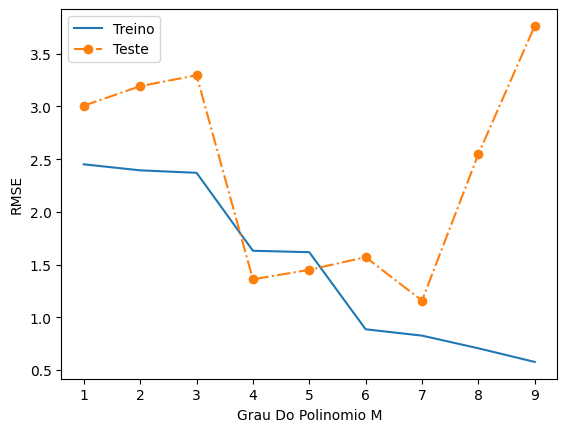

In [63]:
# your code goes here:
degrees = range(1,10)
rmse_treino = []
rmse_teste = []

# Graus polinomiais a serem testados
degrees = range(1, 10)

# Loop pelos graus polinomiais
for degree in degrees:
    # Geração das features polinomiais
    X_treino_polinomial = np.column_stack([x_treino ** i for i in range(1, degree+1)])
    X_teste_polinomial = np.column_stack([x_teste ** i for i in range(1, degree+1)])

    # Cálculo dos coeficientes do modelo de regressão linear
    theta = np.linalg.inv(X_treino_polinomial.T.dot(X_treino_polinomial)).dot(X_treino_polinomial.T).dot(y_treino)

    # Previsão no conjunto de treino e no conjunto teste respectivamente
    y_treino_pred = X_treino_polinomial.dot(theta)
    y_teste_pred = X_teste_polinomial.dot(theta)

    # Cálculo do RMSE de treino e teste respectivamente
    rmse_treino.append(np.sqrt(np.sum((y_treino - y_treino_pred) ** 2) / len(y_treino)))
    rmse_teste.append(np.sqrt(np.sum((y_teste - y_teste_pred) ** 2) / len(y_teste)))

# Plot dos resultados
plt.plot(degrees, rmse_treino, label='Treino')
plt.plot(degrees, rmse_teste, label='Teste', linestyle='-.', marker='o')
plt.xlabel('Grau Do Polinomio M')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Training set size vs. RMSE
Generate the plot (as in __Figure 2__) of the RMSE during training and testing at different training set sizes $N$.

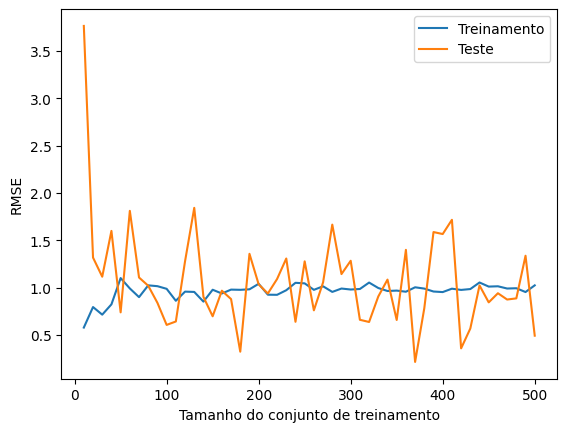

In [76]:
# your code goes here:
mu = 0
theta = 1
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

degree = 9
rmse_treino = []
rmse_teste = []
conjunto_x_treino = []
conjunto_x_teste = []
conjunto_y_treino =[]
conjunto_y_teste = []
tamanho_conjunto_treino = []

#gerando x e y para diferentes tamanhos de treinos
for size in range(15, 506, 10):
    x = np.linspace(0, 10, size)
    y = 4 * np.sin(x) + rng.normal(mu, theta, size)

    #teremos um número de testes fixo com um tamanho de treino variável fixaremos o num_testes.
    num_testes = 5
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=(num_testes/size), random_state=random_state)
    tamanho_conjunto_treino.append(size-5)
    conjunto_x_treino.append(x_treino)
    conjunto_x_teste.append(x_teste)
    conjunto_y_treino.append(y_treino)
    conjunto_y_teste.append(y_teste)

#Ok ficou um pouco feio essas 4 iteraçoes ao mesmo tempo. Porém num 'For' só estava dando um erro de raiz negativa que não consegui resolver
#Desse jeito funcionou :)
for x_train, x_test, y_train, y_test in zip(conjunto_x_treino, conjunto_x_teste, conjunto_y_treino, conjunto_y_teste):
    X_treino_polinomial = np.column_stack([x_train ** i for i in range(1, degree+1)])
    X_teste_polinomial = np.column_stack([x_test ** i for i in range(1, degree+1)])

    # Cálculo dos coeficientes do modelo de regressão linear
    theta = np.linalg.inv(X_treino_polinomial.T.dot(X_treino_polinomial)).dot(X_treino_polinomial.T).dot(y_train)

    # Previsão no conjunto de treino e no conjunto teste respectivamente
    y_treino_pred = X_treino_polinomial.dot(theta)
    y_teste_pred = X_teste_polinomial.dot(theta)

    # Cálculo do RMSE de treino e teste respectivamente adicionando-os numa lista
    rmse_treino.append(np.sqrt(np.sum((y_train - y_treino_pred) ** 2) / len(y_train)))
    rmse_teste.append(np.sqrt(np.sum((y_test - y_teste_pred) ** 2) / len(y_test)))

plt.plot(tamanho_conjunto_treino, rmse_treino, label='Treinamento')
plt.plot(tamanho_conjunto_treino, rmse_teste, label='Teste')
plt.xlabel('Tamanho do conjunto de treinamento')
plt.ylabel('RMSE')
plt.legend()
plt.show()
    
    


# Classification with KNN
In this exercise you will implement the K-nearest neighbours (K-NN) algorithm for binary classification without using any Python libraries such as scikit-learn. Use it to classify the Ionosphere dataset. You will also need to determine the optimal value of $K$ using the F1-score on a validation set and report the test set performance based on the F1-score.

Dataset: The Ionosphere dataset contains radar data collected from a radar system in Goose Bay, Canada. The dataset contains 351 observations, with 34 attributes each. The last column represents the class, which is either "good" (1) or "bad" (0).

Specifically:
1. Load the Ionosphere dataset into a data frame and split it into a training set ($80\%$), a validation set ($10\%$), and a testing set ($10\%$).
    
2. You will write code that implements the K-NN algorithm for binary classification. Use Euclidean distance as the distance metric.
    - _Obs: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours._


3. Use the K-NN algorithm on the training set for a range of values of $K$ and evaluate its performance on the validation set using the F1-score. Plot the F1-score on the validation set against the range of values that were tried for $K$. Your plot should look like Figure 3. Choose the value of $K$ that gives the best F1-score.
    - You will also have to implement the F1-score from scratch.


4. Report the F1-score of the K-NN algorithm on the test set using the selected value of $K$.


* __Note:__ You are not allowed to use any Python libraries such as scikit-learn to implement the K-NN algorithm or to calculate distances. You may use numpy or other basic libraries for matrix operations.

* As a reminder, the F1-score is calculated as follows: $F1 = 2 \times \frac{precision \times recall}{precision + recall}$ or $F1 = \frac{TP}{TP + \frac{1}{2} (FP + FN)}$
    
    

### Preparing the dataset

Load the dataset into a pandas `DataFrame`, split the features from the target variable, and generate the training, validation and testing sets.

In [65]:
iono_df = pd.read_csv('ionosphere_data_cleaned.csv')

Let's inspect the dataset. There are 34 features and one target column

In [66]:
iono_df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,label
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


We can inspect the class distribution by using `value_counts()` on the target column

In [67]:
iono_df.label.value_counts()

1    225
0    126
Name: label, dtype: int64

Let's separate our features from our target column

In [68]:
X_io = iono_df.values[:, :-1]
y_io = iono_df.values[:, -1]

Now you will write code to split the data into training ($80\%$), validation ($10\%$), and testing ($10\%$). 

You can use `train_test_split()` but make sure to calculate the right proportions and remember that this only returns 2 different sets, not 3.

In [69]:
# set the random_state for reproducibilty of your results
random_state = 42


In [70]:
# your code goes here:

# Separando 80% para treino e 20% para teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_io, y_io, test_size=0.2, random_state=42)

# Separando metade dos dados de teste para validação e 50% para teste final
X_validacao, X_teste_final, Y_validacao, Y_teste_final = train_test_split(X_teste, Y_teste, test_size=0.5, random_state=42)

#Temos então separados 80% pros treinos 10% pros testes e 10% pra validação

### Here you will implement the KNN algorithm using the euclidean distance

In [71]:
# your code goes here:
def distancia_euclidiana(x1, x2):
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [72]:
def knn_predict(X_train, y_train, X_test, k):
    """
    Realiza a previsão utilizando o algoritmo k-NN com distância euclidiana.

    Args:
        X_train (numpy.ndarray): Conjunto de treinamento com as amostras e suas características.
        y_train (numpy.ndarray): Conjunto de treinamento com os rótulos.
        X_test (numpy.ndarray): Conjunto de teste com as amostras e suas características.
        k (int): Quantidade de vizinhos mais próximos a serem utilizados.

    Returns:
        y_pred numpy.ndarray: Previsões para o conjunto de teste.
    """
    # Obtém o número de amostras no conjunto de teste e cria um array numpy para armazenar as previsões
    n_test_samples = X_test.shape[0]
    y_pred = np.zeros(n_test_samples, dtype=int)

    #Calcula a distância euclidiana entre a amostra do conjunto de teste e cada amostra do conjunto de treinamento
    for i in range(n_test_samples):
        distances = np.array([distancia_euclidiana(X_train[j], X_test[i]) for j in range(X_train.shape[0])])

        #Obtém os índices e rótulos dos k-vizinhos mais próximos
        nearest_indices = np.argsort(distances)[:k]
        nearest_classes = y_train[nearest_indices]

        # Conta a quantidade de cada rótulo presente nos k-vizinhos mais próximos e armazena o mais frequente com a previsao
        counts = np.bincount(nearest_classes.astype(int))
        y_pred[i] = np.argmax(counts)

    return y_pred

### Select the optimal $K$ by plotting the F1 score in the validation set at different values of $K$

First create a function that calculates the F1-score

In [73]:
# your code goes here:
def calculate_f1_score(y_verdadeiro, y_pred):
    # usaremos verdadeiros positivos e falsos positivos para determinar a precisão
    tp = 0 
    fp = 0 
    for i in range(len(y_verdadeiro)):
        if y_pred[i] == 1 and y_verdadeiro[i] == 1:
            tp += 1
        elif y_pred[i] == 1 and y_verdadeiro[i] == 0:
            fp += 1
    precisao = tp / (tp + fp)
    #Usaremo verdadeiros positivos e falsos negativos para determinar o recall
    recall_tp = 0
    fn = 0
    for i in range(len(y_verdadeiro)):
        if y_pred[i] == 1 and y_verdadeiro[i] == 1:
            recall_tp += 1
        elif y_pred[i] == 0 and y_verdadeiro[i] == 1:
            fn += 1
    recall = recall_tp / (recall_tp + fn)

    f1 = 2 * (precisao * recall) / (precisao + recall)
    return f1  

Generate the plot and select the optimal $K$

Text(0, 0.5, 'F1 score')

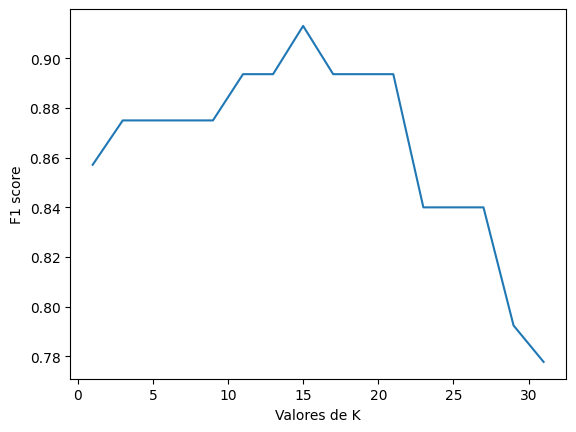

In [77]:
# your code goes here:
k_values = list(range(1, 32, 2))
valores_f1 = []
#Usa knn para predizer y e calcula o f1 score para cada k é feito o plot disso
for k in k_values:
    y_pred = knn_predict(X_treino, Y_treino, X_validacao, k)
    f1 = calculate_f1_score(Y_validacao, y_pred)
    valores_f1.append(f1)
                      
# Plotar pontuações F1 em relação aos valores de K tentados
plt.plot(k_values, valores_f1)
plt.xlabel('Valores de K')
plt.ylabel('F1 score')

Calculate the test set performance using the optimal $K$

In [78]:
# your code goes here:

# Inicializando as variáveis de melhor desempenho e seu respectivo k
otimo_k = None
melhor_performance = 0
#Usaremos A lista de K usada no gráfico

# Loop para buscar o melhor k
for k in k_values:
    # Realizando a previsão com k vizinhos mais próximos
    Y_predicao = knn_predict(X_treino, Y_treino, X_validacao, k)

    # Calculando o desempenho F1 para o conjunto de validação
    f1_validacao = calculate_f1_score(Y_validacao, Y_predicao)

    # Verificando se o desempenho atual é melhor que o melhor desempenho até agora
    if f1_validacao > melhor_performance:
        melhor_performance = f1_validacao
        otimo_k = k

# Utilizando o melhor k encontrado para realizar a previsão no conjunto de teste final
Y_predicao_final = knn_predict(X_treino, Y_treino, X_teste_final, otimo_k)

# Calculando o desempenho F1 para o conjunto de teste final
f1_teste_final = calculate_f1_score(Y_teste_final, Y_predicao_final)

# Imprimindo o desempenho final
print("O valor ótimo de k foi encontrado como:", otimo_k)
print("O desempenho F1 no conjunto de teste final foi de:", f1_teste_final)

O valor ótimo de k foi encontrado como: 15
O desempenho F1 no conjunto de teste final foi de: 0.8627450980392156
